In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew

In [2]:
df1=pd.read_csv("C:/Users/ADMIN/Desktop/projects_coding/singapore/ResaleFlatPrices/Resale Flat Prices 2000 - Feb 2012.csv")
df2=pd.read_csv("C:/Users/ADMIN/Desktop/projects_coding/singapore/ResaleFlatPrices/Resale flat prices Jan-2017 onwards.csv")
df3=pd.read_csv("C:/Users/ADMIN/Desktop/projects_coding/singapore/ResaleFlatPrices/Resale Flat Prices Mar 2012 to Dec 2014.csv")
df4=pd.read_csv("C:/Users/ADMIN/Desktop/projects_coding/singapore/ResaleFlatPrices/Resale Flat Prices(1990-1999).csv")
df5=pd.read_csv("C:/Users/ADMIN/Desktop/projects_coding/singapore/ResaleFlatPrices/Resale Flat PricesJan 2015 to Dec 2016.csv")

In [3]:
df1.head(2)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0


In [4]:
df2.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


In [5]:
df3.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0


In [6]:
df4.head(2)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000


In [7]:
df=pd.concat([df1,df2,df3,df4,df5],axis=0)
df.reset_index(drop=1,inplace=True)

In [8]:
df.tail(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
939940,2016-12,YISHUN,5 ROOM,733,YISHUN AVE 5,04 TO 06,121.0,Improved,1984,430000.0,66
939941,2016-12,YISHUN,5 ROOM,175,YISHUN AVE 7,13 TO 15,133.0,Improved,1986,455000.0,68
939942,2016-12,YISHUN,5 ROOM,795,YISHUN RING RD,04 TO 06,123.0,Improved,1987,491000.0,69
939943,2016-12,YISHUN,5 ROOM,386,YISHUN RING RD,01 TO 03,127.0,Improved,1988,470000.0,70
939944,2016-12,YISHUN,5 ROOM,166,YISHUN RING RD,04 TO 06,121.0,Improved,1987,410000.0,70
939945,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,488000.0,82
939946,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,455000.0,69
939947,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,778000.0,74
939948,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,575000.0,70
939949,2016-12,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,735000.0,70


In [9]:
df.shape

(939950, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939950 entries, 0 to 939949
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                939950 non-null  object 
 1   town                 939950 non-null  object 
 2   flat_type            939950 non-null  object 
 3   block                939950 non-null  object 
 4   street_name          939950 non-null  object 
 5   storey_range         939950 non-null  object 
 6   floor_area_sqm       939950 non-null  float64
 7   flat_model           939950 non-null  object 
 8   lease_commence_date  939950 non-null  int64  
 9   resale_price         939950 non-null  float64
 10  remaining_lease      230900 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.9+ MB


In [11]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,939950.000000,939950.000000,9.399500e+05
mean,95.685611,1988.409383,3.248631e+05
std,25.804280,10.796594,1.743023e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.950000e+05
50%,93.000000,1986.000000,3.000000e+05
75%,113.000000,1996.000000,4.200000e+05
max,366.700000,2021.000000,1.588000e+06


In [12]:
df['year']=df['month'].str.split('-').str[0].astype("int64")
df['month']=df['month'].str.split('-').str[1].astype('int64')

In [13]:
df['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2013,
       2014, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2015, 2016], dtype=int64)

In [14]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [15]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN,2000
1,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN,2000
2,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN,2000
3,1,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN,2000
4,1,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
939945,12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,488000.0,82,2016
939946,12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,455000.0,69,2016
939947,12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,778000.0,74,2016
939948,12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,575000.0,70,2016


In [16]:
remaining_lease_new=[]
for item in df['remaining_lease'].astype(str):
    item1=item.replace("years","")
    item2=item1.replace('months',"")
    item3=item2.replace("month","")
    item4=item3.strip()
    item5=item4.split("  ")
    remaining_lease_new.append(item5)

data_remaining_lease=pd.DataFrame(remaining_lease_new,columns=["Remaining_lease_years","Remaining_lease_months"])
data_remaining_lease["Remaining_lease_years"]=data_remaining_lease["Remaining_lease_years"].replace("nan",0).astype(int)

data_remaining_lease["Remaining_lease_months"]=data_remaining_lease["Remaining_lease_months"].fillna(0).astype(int)



In [17]:
df["Remaining_lease_years"]=data_remaining_lease["Remaining_lease_years"].values
df["Remaining_lease_months"]=data_remaining_lease["Remaining_lease_months"].values
df.drop("remaining_lease",axis=1,inplace=True)

In [18]:
df.iloc[369651:378900,:]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,Remaining_lease_years,Remaining_lease_months
369651,1,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,2017,61,4
369652,1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,2017,60,7
369653,1,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0,2017,62,5
369654,1,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0,2017,62,1
369655,1,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0,2017,62,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378895,6,SENGKANG,5 ROOM,403D,FERNVALE LANE,04 TO 06,114.0,Premium Apartment,2004,405000.0,2017,86,0
378896,6,SENGKANG,5 ROOM,188C,RIVERVALE DR,16 TO 18,115.0,Improved,2000,410000.0,2017,82,2
378897,6,SENGKANG,5 ROOM,201C,COMPASSVALE DR,01 TO 03,110.0,Improved,2001,415000.0,2017,83,2
378898,6,SENGKANG,5 ROOM,158A,RIVERVALE CRES,16 TO 18,110.0,Premium Apartment,2003,415000.0,2017,85,5


In [19]:
df.isnull().sum()

month                     0
town                      0
flat_type                 0
block                     0
street_name               0
storey_range              0
floor_area_sqm            0
flat_model                0
lease_commence_date       0
resale_price              0
year                      0
Remaining_lease_years     0
Remaining_lease_months    0
dtype: int64

<Axes: >

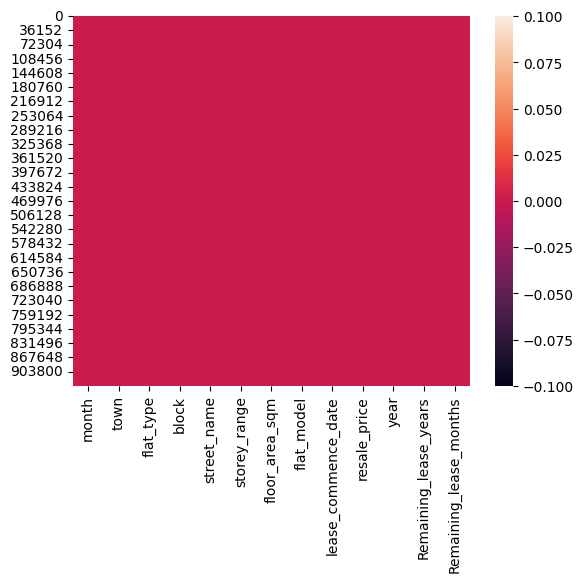

In [20]:
sns.heatmap(df.isnull())

In [21]:
df.flat_model.unique() 

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Apartment',
       'Simplified', 'Model A-Maisonette', 'Maisonette',
       'Multi Generation', 'Adjoined flat', 'Premium Apartment',
       'Terrace', 'Improved-Maisonette', 'Premium Maisonette', '2-room',
       'Model A2', 'DBSS', 'Type S1', 'Type S2', 'Premium Apartment Loft',
       '3Gen', 'IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD',
       'SIMPLIFIED', 'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE',
       'TERRACE', '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT'], dtype=object)

In [22]:
df.flat_type.unique() 

array(['3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '2 ROOM',
       'MULTI-GENERATION', '1 ROOM', 'MULTI GENERATION'], dtype=object)

In [23]:
df.town.unique() 

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'QUEENSTOWN',
       'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS',
       'YISHUN', 'SEMBAWANG', 'PUNGGOL', 'LIM CHU KANG'], dtype=object)

In [24]:
df.block.unique() 

array(['170', '174', '216', ..., '609C', '610B', '226E'], dtype=object)

In [25]:
df.street_name.unique()

array(['ANG MO KIO AVE 4', 'ANG MO KIO AVE 1', 'ANG MO KIO AVE 10',
       'ANG MO KIO AVE 2', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 5',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 8', 'ANG MO KIO AVE 9',
       'ANG MO KIO ST 21', 'ANG MO KIO ST 31', 'ANG MO KIO ST 11',
       'BEDOK RESERVOIR RD', 'BEDOK NTH RD', 'BEDOK NTH ST 3',
       'BEDOK STH AVE 1', 'BEDOK STH RD', 'CHAI CHEE AVE',
       'NEW UPP CHANGI RD', 'CHAI CHEE DR', 'CHAI CHEE RD',
       'BEDOK NTH AVE 1', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 4', 'BEDOK NTH ST 1', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK STH AVE 2', 'BEDOK STH AVE 3',
       'CHAI CHEE ST', 'LENGKONG TIGA', 'JLN TENAGA', 'SIN MING RD',
       'SHUNFU RD', 'BISHAN ST 11', 'BISHAN ST 12', 'BISHAN ST 13',
       'SIN MING AVE', 'BISHAN ST 22', 'BISHAN ST 23', 'BISHAN ST 24',
       'BRIGHT HILL DR', 'BT BATOK ST 51', 'BT BATOK ST 52',
       'BT BATOK ST 11', 'BT BATOK ST 21', 'BT BATOK ST 34',
       'BT BATOK WEST AVE 4', 

In [26]:
label_encoding=LabelEncoder()
df.flat_model=label_encoding.fit_transform(df.flat_model)
df.flat_type=label_encoding.fit_transform(df.flat_type)
df.town=label_encoding.fit_transform(df.town)
df.block=label_encoding.fit_transform(df.block)
df.street_name=label_encoding.fit_transform(df.street_name)

In [27]:
df.flat_model.unique() 


array([ 9, 21, 16, 29,  5, 28, 17, 15, 19,  4, 23, 31, 10, 25,  1, 18,  6,
       32, 33, 24,  2,  7, 20, 12, 27, 26, 13,  3, 11, 30,  0,  8, 14, 22])

In [28]:
df.flat_type.unique()

array([2, 3, 4, 5, 1, 7, 0, 6])

In [29]:
df.town.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       19, 21, 22, 23, 24, 25, 26, 20, 18, 15])

In [30]:
df.block.unique()

array([ 246,  263,  449, ..., 1767, 1772,  498])

In [31]:
df.street_name.unique()

array([ 17,  13,  14,  15,  16,  18,  19,  20,  21,  23,  24,  22,  45,
        39,  42,  47,  50, 115, 342, 116, 117,  35,  36,  37,  38,  40,
        41,  43,  48,  49, 118, 306, 252, 440, 428,  54,  55,  56, 439,
        57,  58,  59,  65,  80,  81,  71,  72,  79,  83,  87,  68,  69,
        76,  77,  78,  85,  67,  66,  82, 451, 491, 228,  91, 238, 301,
       492, 494, 496, 587,  93, 493,  52, 199, 237, 243, 387, 200,  89,
       167, 180, 300, 168, 442, 189, 366, 367,  32,  92, 181, 397, 177,
       384, 504, 244, 291, 396, 498, 119, 395, 513, 382, 394, 304, 488,
       490, 122, 123, 124, 125, 129, 134, 135, 136, 137, 139, 132, 133,
       153, 143, 144, 145, 146, 147, 154, 516, 517, 151, 148, 141, 194,
       248,   5, 178, 198, 365, 437, 438, 165, 191, 368, 506,  31, 324,
         6, 193, 179, 210, 215, 211, 212, 207, 208, 214, 223, 224, 225,
       320, 209, 218, 220, 213, 217, 219, 487, 262, 258, 259, 260, 257,
       349, 261,  61,  62,  63, 203, 583, 263, 270, 271, 273, 28

In [32]:
df[["storey_range_start","storey_range_end"]]=df.storey_range.str.split(" TO ",expand=True).astype(int)
df.drop("storey_range",axis=1,inplace=True)


In [33]:
df.head(2)

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,Remaining_lease_years,Remaining_lease_months,storey_range_start,storey_range_end
0,1,0,2,246,17,69.0,9,1986,147000.0,2000,0,0,7,9
1,1,0,2,263,17,61.0,9,1986,144000.0,2000,0,0,4,6


In [34]:
# All categorical data converted into numerical 
#Let's check the correlation of features 
corr=df.corrwith(df.resale_price).abs().sort_values()
corr

month                     0.015149
street_name               0.030555
block                     0.040303
town                      0.057701
flat_model                0.185702
storey_range_start        0.249208
storey_range_end          0.251451
Remaining_lease_months    0.435118
lease_commence_date       0.541760
floor_area_sqm            0.551958
Remaining_lease_years     0.576711
flat_type                 0.578751
year                      0.683258
resale_price              1.000000
dtype: float64

<Axes: >

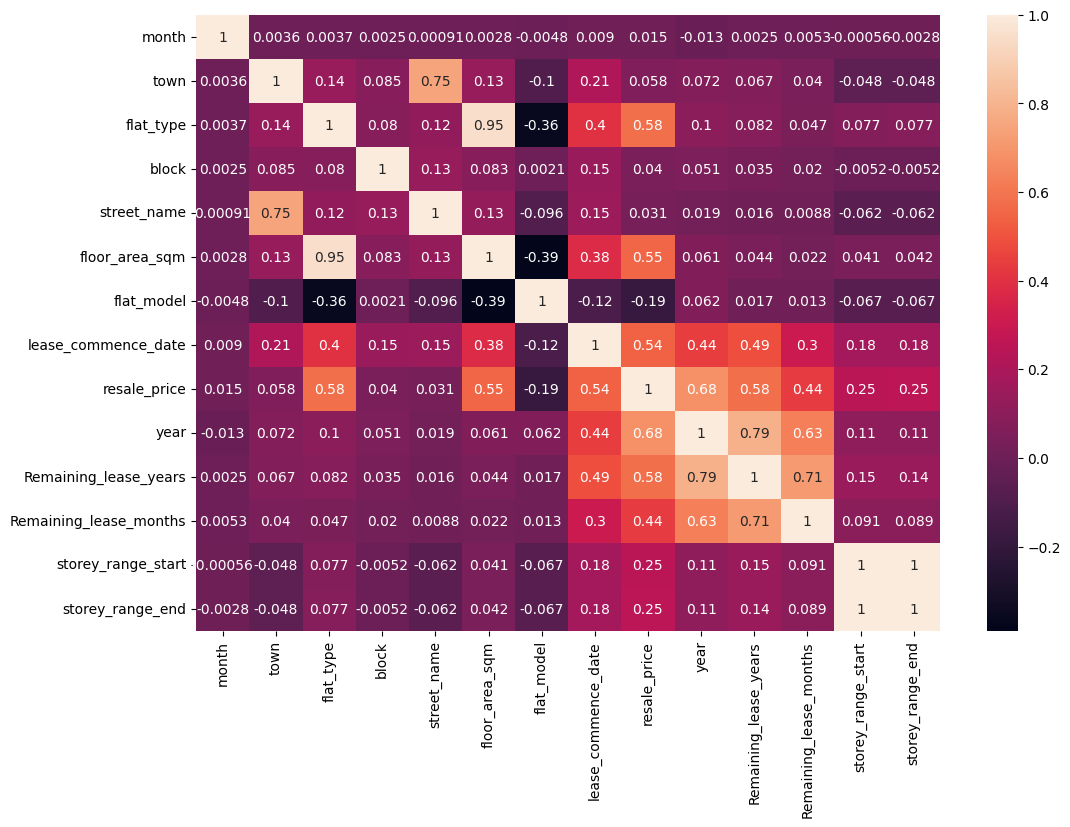

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [36]:
# In this figure month,street_name,block have very low correlation with target features so we drop the columns

df.drop(["month","street_name","block"],axis=1,inplace=True)

In [37]:
df.head(2)

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,Remaining_lease_years,Remaining_lease_months,storey_range_start,storey_range_end
0,0,2,69.0,9,1986,147000.0,2000,0,0,7,9
1,0,2,61.0,9,1986,144000.0,2000,0,0,4,6


In [38]:
df.shape

(939950, 11)

In [39]:
df.duplicated().sum()

65565

In [40]:
# let's check the distribution,skewness,outlier for each features using hisplot,boxplt,distributinplot
for i in  df.columns:
    print("skew in",i,skew(df[i]))

skew in town -0.08807612701553828
skew in flat_type 0.3950082638275994
skew in floor_area_sqm 0.36624103837922467
skew in flat_model 0.2068099441744667
skew in lease_commence_date 0.6606339188606463
skew in resale_price 0.970538785103693
skew in year 0.28920314176279516
skew in Remaining_lease_years 1.3265808010618265
skew in Remaining_lease_months 2.379840536589514
skew in storey_range_start 1.3617545489362204
skew in storey_range_end 1.3623988889077598


In [41]:
def beforeout(df,column):
    plt.figure(figsize=(12,5))
    plt.subplot(1,3,1)
    sns.histplot(df,x=df[column],color="yellow",bins=30)
    plt.title("Histogram"+column)

    plt.subplot(1,3,2)
    plt.boxplot(df[column])
    plt.title("Boxplot"+column)

    plt.subplot(1,3,3)
    plt.violinplot(df[column])
    plt.title("voilinplot"+column)
    plt.show()

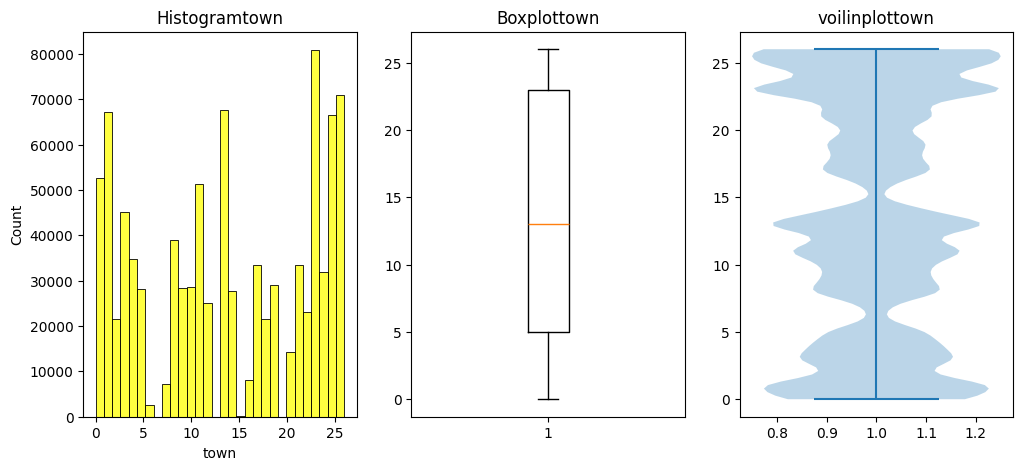

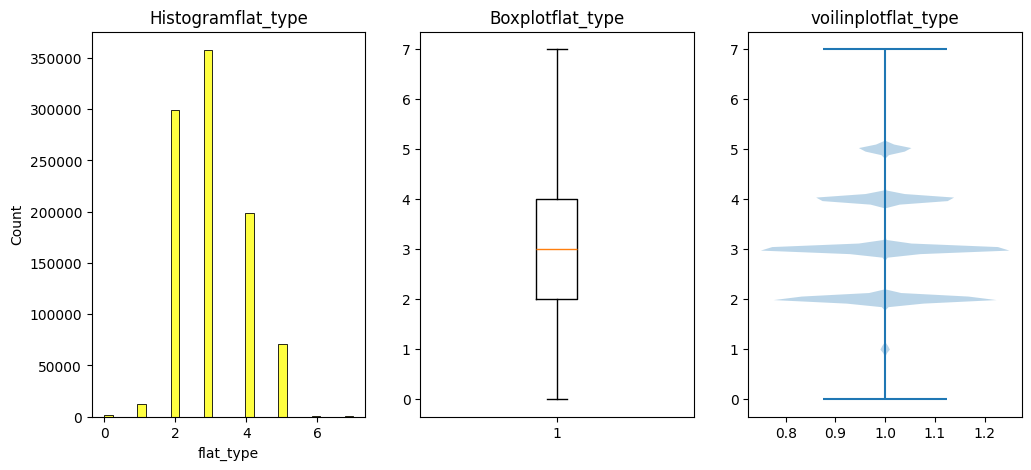

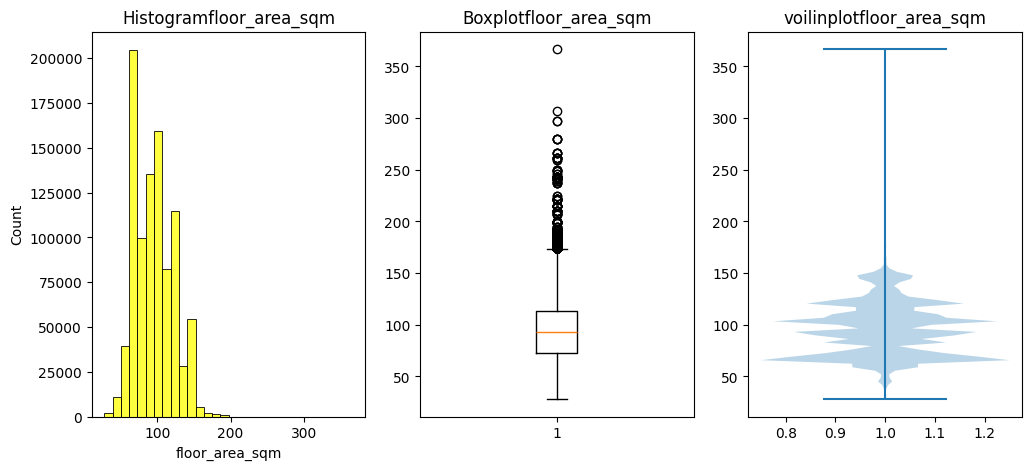

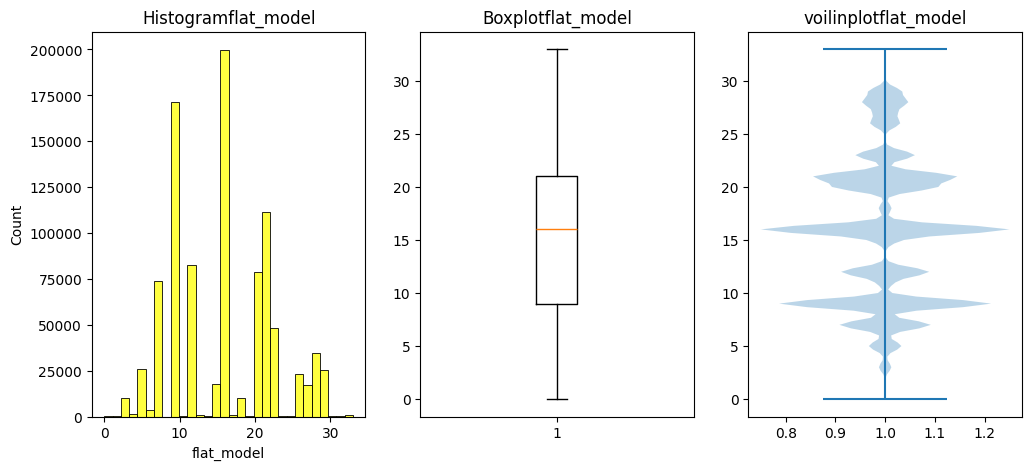

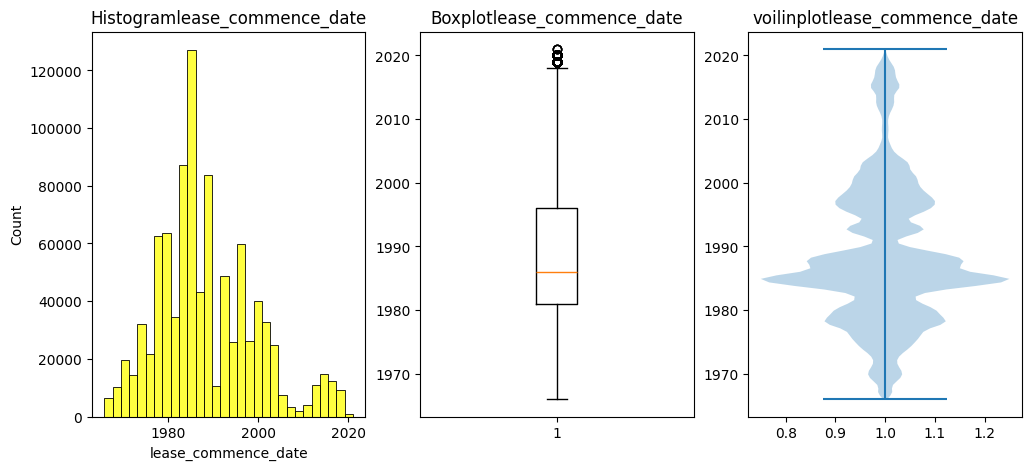

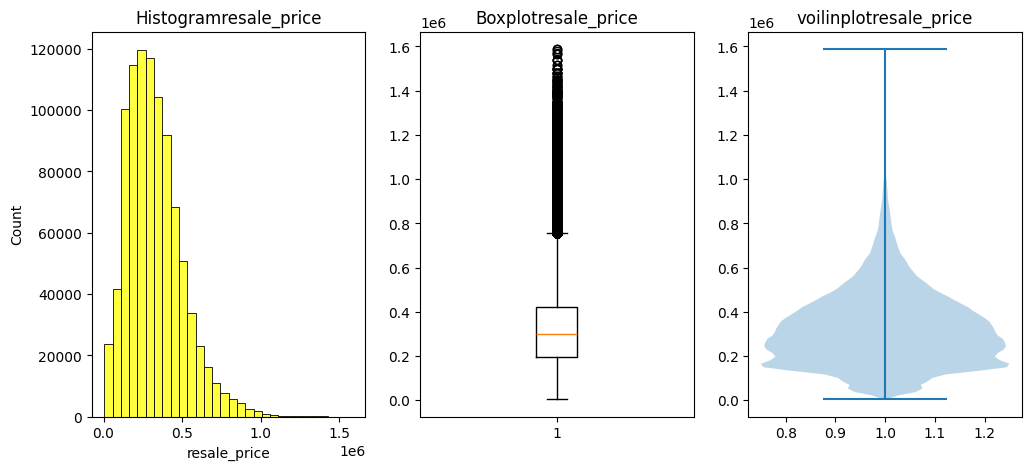

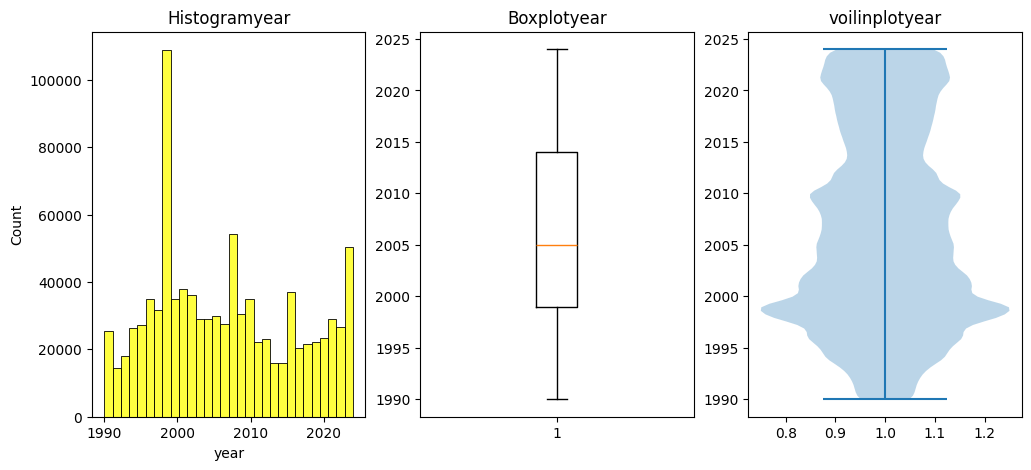

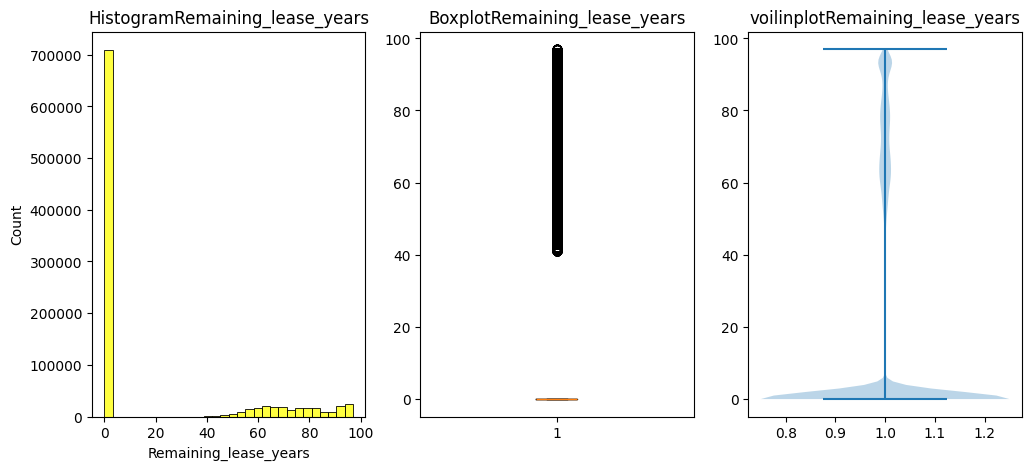

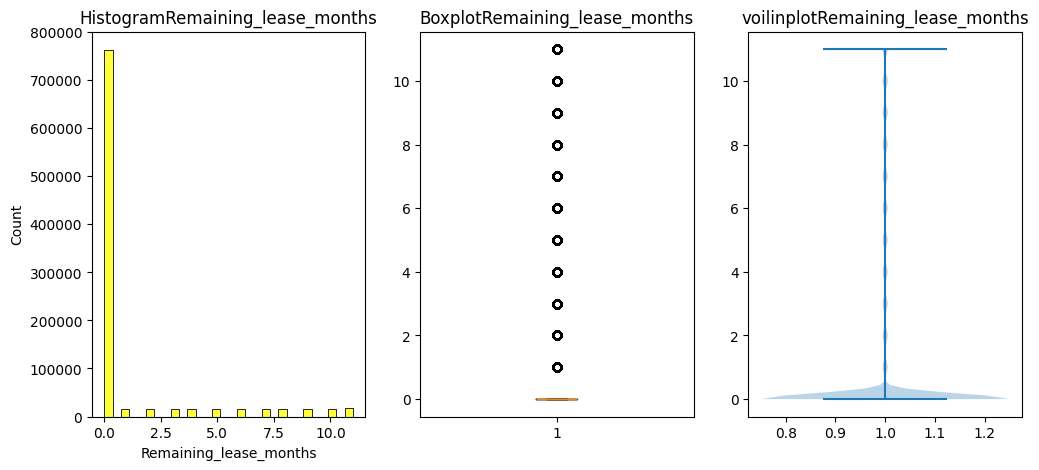

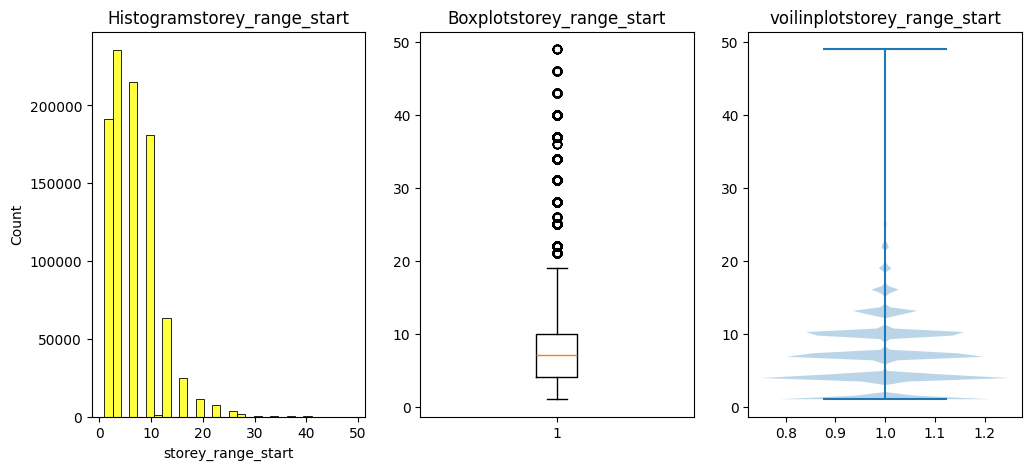

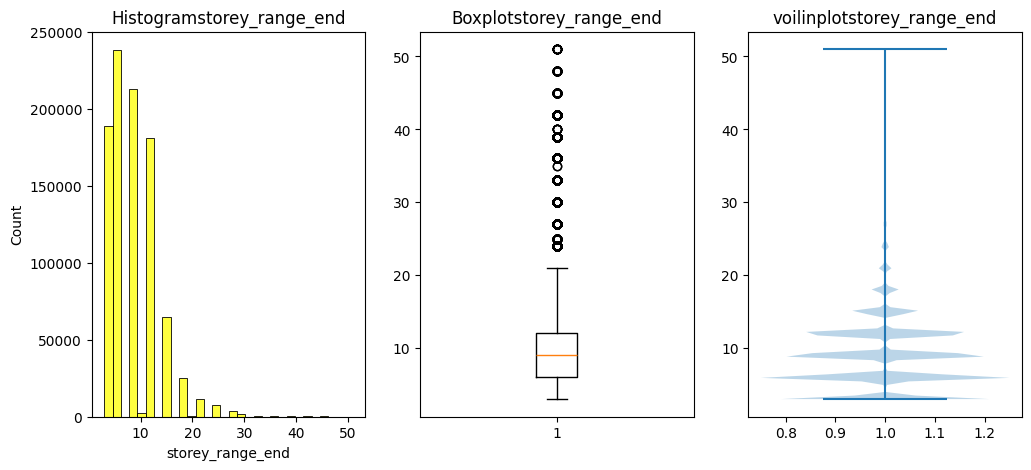

In [42]:
for item in df.columns:
    beforeout(df,item)

In [43]:
col=["Storey_rang_start","storey_range_end","Remaining_lease_months","Remaining_lease_years","resale_price","lease_commence_date","floor_area_sqm"]
def outlier(df1,column1):
    Q1=df1[column1].quantile(.25)
    Q3=df1[column1].quantile(.75)
    IQR=Q3-Q1
    lower_fence=Q1-(1.5*IQR)
    upper_fence=Q3+(1.5*IQR)
    df1[column1]=df1[column1].clip(lower_fence,upper_fence)
    return df1

for items in df.columns:
    outlier(df,items)

In [44]:
for i in df.columns:
    print("skew in ",i,skew(df[i]))

skew in  town -0.08807612701553828
skew in  flat_type 0.3950082638275994
skew in  floor_area_sqm 0.3305211119600192
skew in  flat_model 0.2068099441744667
skew in  lease_commence_date 0.6561453223069902
skew in  resale_price 0.6458797102305782
skew in  year 0.28920314176279516
skew in  Remaining_lease_years nan
skew in  Remaining_lease_months nan
skew in  storey_range_start 0.7017369330195057
skew in  storey_range_end 0.7015832155711624


In [45]:
df["Remaining_lease_years"]=np.cbrt(data_remaining_lease["Remaining_lease_years"])
df["Remaining_lease_months"]=np.cbrt(data_remaining_lease["Remaining_lease_months"])

In [46]:
df.duplicated().sum()
new_df=df.drop_duplicates()
new_df.reset_index(drop=True,inplace=True)

In [47]:
for i in new_df.columns:
    print("skew in ",i,skew(new_df[i]))

skew in  town -0.08740260344502819
skew in  flat_type 0.36708442335064456
skew in  floor_area_sqm 0.29664623987132865
skew in  flat_model 0.22304063095717686
skew in  lease_commence_date 0.6329217831125303
skew in  resale_price 0.6027051984841786
skew in  year 0.2369018064684999
skew in  Remaining_lease_years 1.1146351962702405
skew in  Remaining_lease_months 1.6712921591137266
skew in  storey_range_start 0.6860362618125394
skew in  storey_range_end 0.6858560051288206


In [48]:
def afterout(df,column):
    plt.figure(figsize=(12,5))
    plt.subplot(1,3,1)
    sns.histplot(df,x=df[column],color="yellow",bins=30)
    plt.title("Histogram"+column)

    plt.subplot(1,3,2)
    plt.boxplot(df[column])
    plt.title("Boxplot"+column)

    plt.subplot(1,3,3)
    plt.violinplot(df[column])
    plt.title("voilinplot"+column)
    plt.show()

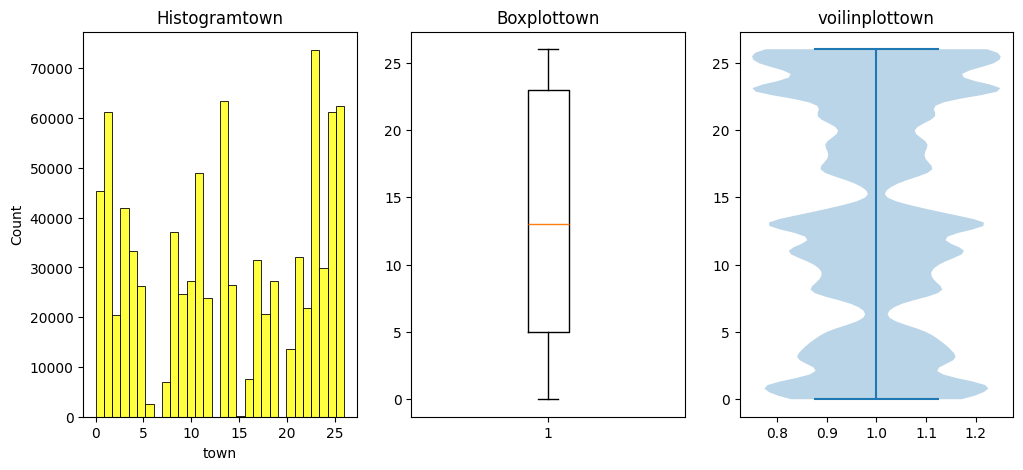

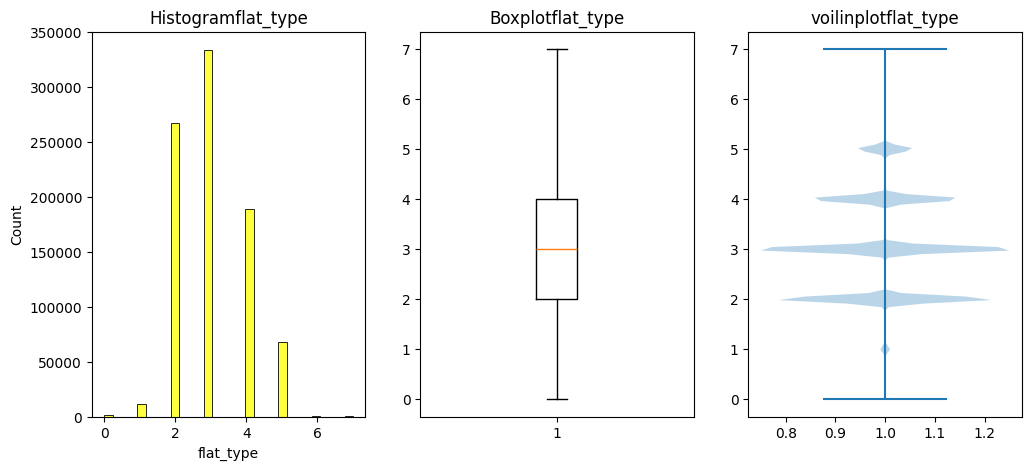

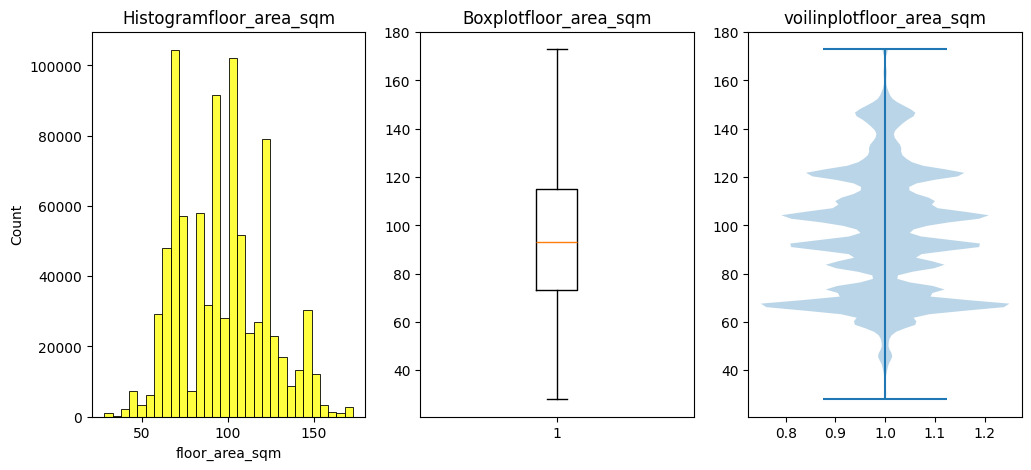

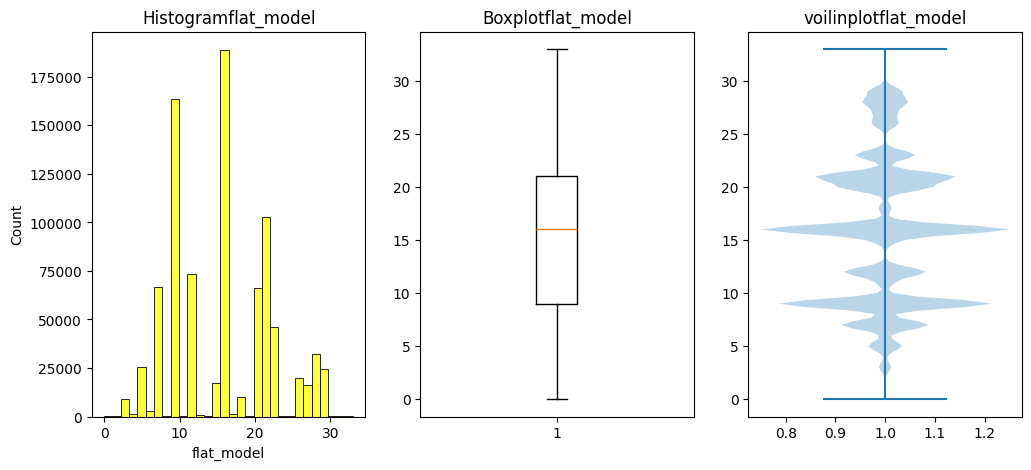

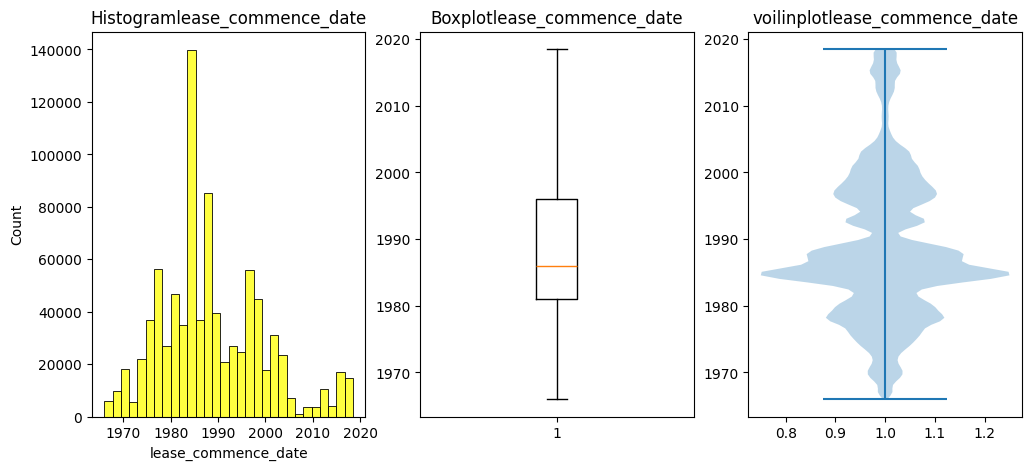

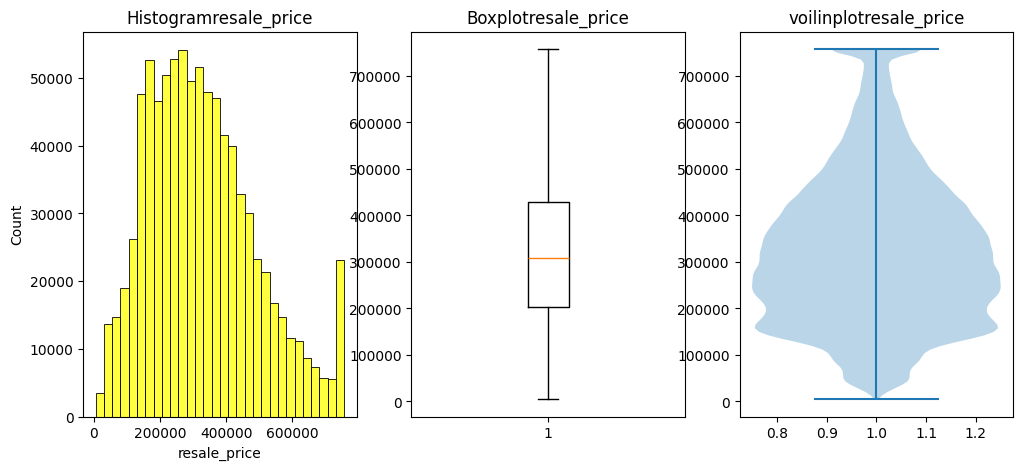

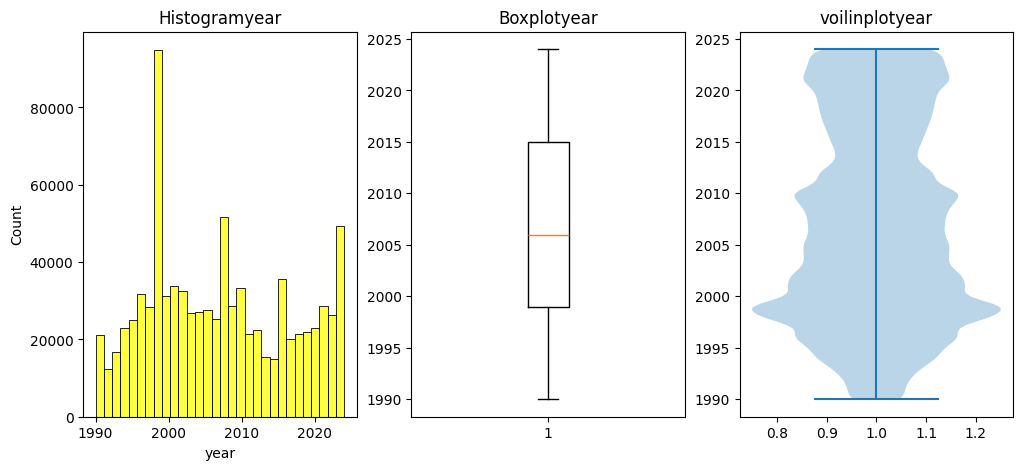

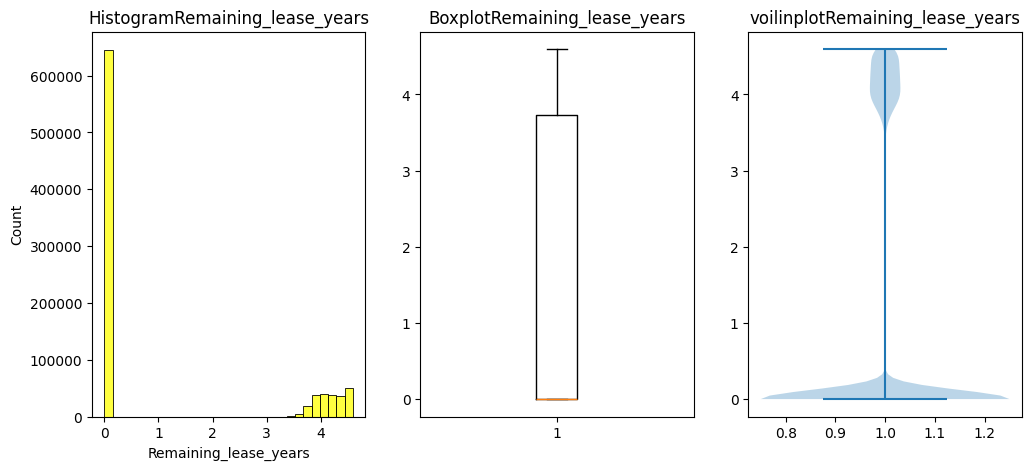

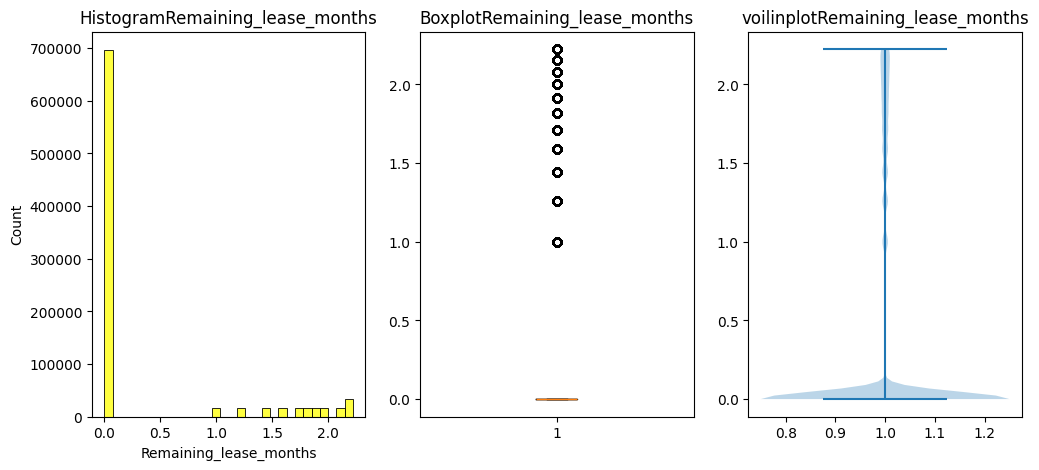

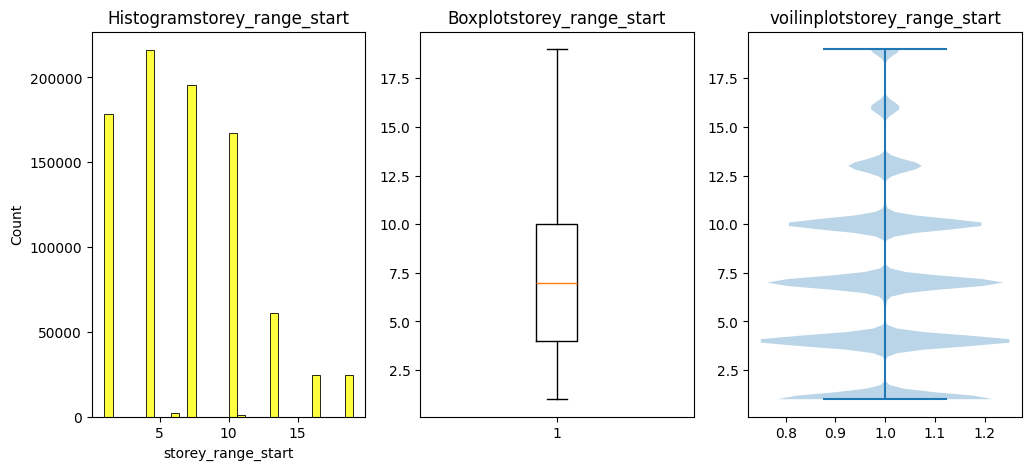

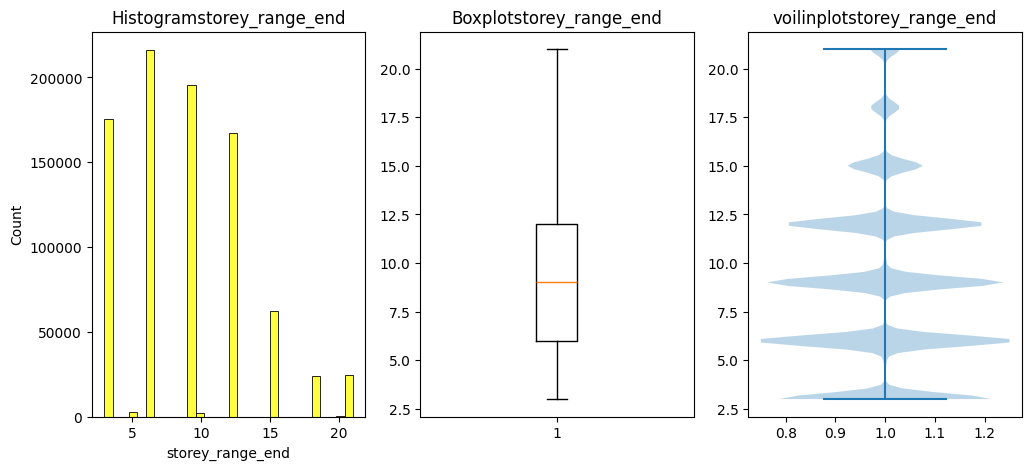

In [49]:
for i in new_df.columns:
    afterout(new_df,i)

In [50]:
new_df

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,Remaining_lease_years,Remaining_lease_months,storey_range_start,storey_range_end
0,0,2,69.0,9,1986.0,147000.0,2000,0.000000,0.0,7,9
1,0,2,61.0,9,1986.0,144000.0,2000,0.000000,0.0,4,6
2,0,2,73.0,21,1976.0,159000.0,2000,0.000000,0.0,7,9
3,0,2,73.0,21,1976.0,167000.0,2000,0.000000,0.0,7,9
4,0,2,67.0,21,1976.0,163000.0,2000,0.000000,0.0,7,9
...,...,...,...,...,...,...,...,...,...,...,...
871223,26,4,121.0,9,1987.0,410000.0,2016,4.121285,0.0,4,6
871224,26,4,112.0,9,2000.0,488000.0,2016,4.344481,0.0,13,15
871225,26,4,122.0,9,1987.0,455000.0,2016,4.101566,0.0,1,3
871226,26,5,146.0,15,1988.0,575000.0,2016,4.121285,0.0,1,3


In [51]:
new_df.duplicated().sum()

0

In [52]:
cleaned=new_df.copy()
print("old",new_df.columns)
print("new",cleaned.columns)

old Index(['town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'year', 'Remaining_lease_years',
       'Remaining_lease_months', 'storey_range_start', 'storey_range_end'],
      dtype='object')
new Index(['town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'year', 'Remaining_lease_years',
       'Remaining_lease_months', 'storey_range_start', 'storey_range_end'],
      dtype='object')


In [53]:
#data preprocessed done.cleaned the data.Let's train the model to predict the unseen value
# let's import the model libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
import pickle
import warnings
warnings.filterwarnings("ignore")

In [54]:
x_new=cleaned.drop("resale_price",axis=1)
y_new=cleaned.resale_price

In [55]:
# To split the train data and test data
# Its important to scale the datapoints.it ensures the data points using balancedscale.
#we can use standard scale or minimax scale

scalar=StandardScaler()
x_scale=scalar.fit_transform(x_new)

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y_new,test_size=0.3,random_state=42)
print(x_train.shape)
print(y_test.shape)

(609859, 10)
(261369,)


In [57]:
# To check the model performance 
model=LinearRegression()
print("Linear Regression")
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
print("Training Data")
print("Mean Absolute Error:",mean_absolute_error(y_train,y_pred_train))
print("Mean Squared Error:",mean_squared_error(y_train,y_pred_train))
print("R2 score:",r2_score(y_train,y_pred_train))
print("Test Data")
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred_test))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred_test))
print("R2 score:",r2_score(y_test,y_pred_test))



Linear Regression
Training Data
Mean Absolute Error: 59637.20801917695
Mean Squared Error: 6041333536.42398
R2 score: 0.7781040077870857
Test Data
Mean Absolute Error: 59553.62436529588
Mean Squared Error: 6021149538.121343
R2 score: 0.7783607904541726


In [58]:
model=AdaBoostRegressor()
print("Adaboost Regressor")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred))

Adaboost Regressor
Mean Absolute Error: 76229.38194765942
Mean Squared Error: 7949871949.747726
R2 score: 0.7073642958413563


In [59]:
model=DecisionTreeRegressor()
print("DecisionTreeRegressor")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred))

DecisionTreeRegressor
Mean Absolute Error: 21722.22236372817
Mean Squared Error: 1032230490.21821
R2 score: 0.9620034765001952


In [64]:
model=ExtraTreesRegressor()
print("ExtraTreesRegressor")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred))

ExtraTreesRegressor
Mean Absolute Error: 20274.071795593984
Mean Squared Error: 831898084.8708901
R2 score: 0.9693777354662744


In [63]:
model=GradientBoostingRegressor()
print("GradientBoostingRegressor")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred))

GradientBoostingRegressor
Mean Absolute Error: 34161.331411512234
Mean Squared Error: 2306911648.671197
R2 score: 0.9150823159155292


In [62]:
model=XGBRegressor()
print("XGBRegressor")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred))

XGBRegressor
Mean Absolute Error: 20564.347960465726
Mean Squared Error: 798358926.9967723
R2 score: 0.970612315739192


In [ ]:
# Among all the models tested, XGBRegressor emerged as the best-performing model, achieving the lowest Mean Absolute Error (MAE) of 20,564.35 and the highest R² score of 0.9706, indicating that it explains 97.06% of the variance in the data. This makes it the most reliable model for predicting resale flat prices.

#The ExtraTreesRegressor also performed well with an MAE of 20,274.07 and an R² score of 0.9693, making it a strong alternative. On the other hand, Adaboost Regressor had the lowest performance with a high MAE of 76,229.38 and an R² score of only 0.7073, indicating that it is not well-suited for this task.

